### **Tarea Semana 08: EDP**
#### IF4702 - Física Computacional I
#### Valeria Bonilla Rojas (2018254434)
#### María Fernanda Quesada Mena (2020036474)

In [ ]:
# Importación de librerías
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp

### **Método 1: Cálculo mediante separación de variables**

### Resolución de la parte espacial de la ecuación de difusión

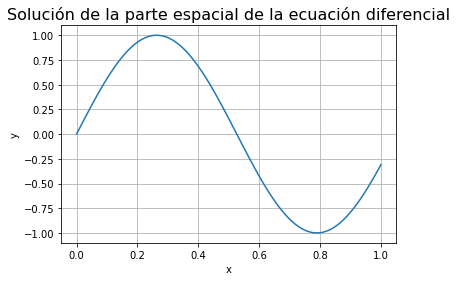

In [ ]:
# Se reescribe la función como una ecuación diferencial de primer orden
def fun(x, X, p):
    k = p[0]
    return np.vstack((X[1], -k**2 * X[0]))

# Se implementan las condiciones de frontera
def bc(ya, yb, p):
    k = p[0]
    return np.array([ya[0], yb[0], ya[1] - k])

# Se definen los puntos  y variables para evaluar la solución
x = np.linspace(0, 10, 100)
y = np.zeros((2, x.size))
y[0, 1] = 1
y[0, 3] = -1

# Se resuelve la ecuación diferencial 
sol = solve_bvp(fun, bc, x, y, p=[6])

# Graficar la solución del método
plt.title("Solución de la parte espacial de la ecuación diferencial", fontsize=16)
x_plot = np.linspace(0, 1, 100)
y_plot = sol.sol(x_plot)[0]
plt.plot(x_plot, y_plot)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### Resolución de la parte temporal de la ecuación de difusión

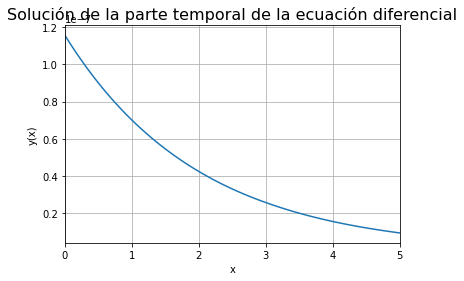

In [ ]:
# Definir los valores de las variavles
k = 1 # se define k como 1 por simplicidad
D = 0.5

# Definir la función 
T = lambda t,T: -k**2*D*T

# Definir puntos para evaluar la solución
x = np.linspace(0,10,100)
x0 = 5.0
T0 = 2.0*np.e**(-(x-x0)**2/1.5)
t = np.linspace(0,5,100)

# Resolver la ecuación diferencial
sol = solve_ivp(T,[0,5], y0 = T0, t_eval=t, method='RK45')

# Graficar la solución del método
plt.plot(sol.t,sol.y[0])
plt.title("Solución de la parte temporal de la ecuación diferencial", fontsize=16)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.xlim([0,5])
plt.grid()
plt.show()

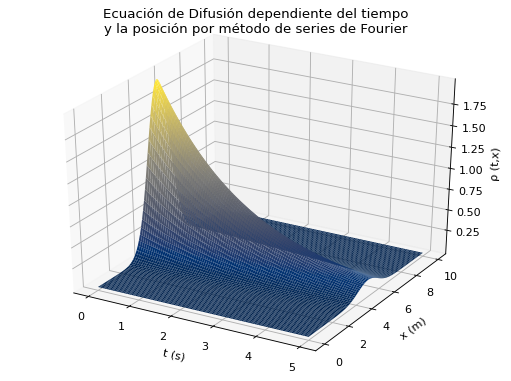

In [ ]:
#Se grafica la solución de la parte temporal en 3D
fig = plt.figure (figsize=(8, 6), dpi=80)
ax = plt.axes (projection = '3d')    
ax.set_title (r"Ecuación de Difusión dependiente del tiempo"
"\n" 
r"y la posición por método de series de Fourier")   
ax.set_xlabel ('t (s)')
ax.set_ylabel ('x (m)')
ax.set_zlabel ('ρ (t,x)')

T, X = np.meshgrid (t, x)
ax.plot_surface (T, X, sol.y, rstride=1, cstride=1, cmap= 'cividis', edgecolor ='none')

### **Método 2: Cálculo mediante series de Fourier**

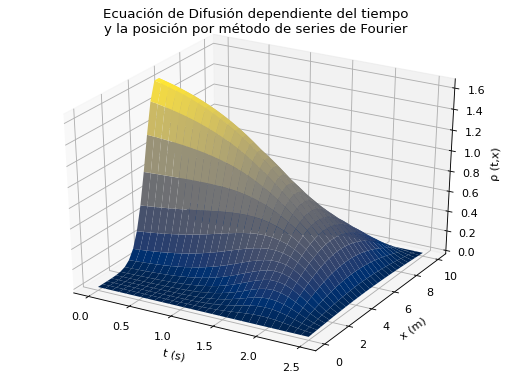

In [ ]:
def CalculoDifusiónInicial (x, x0, l, A):
    """
    Se realiza el cálculo inicial de la difusión con t=0 s
    
    Parámetros de la función:
    ------------------------
    x: Posición en el eje X.
    x0, l, A: Constantes definidas para el problema
    
    Salida de la función
    ---------------------
    Valor de la difusión inicial en x y t
    """
    #Con la función descrita
    DifusionInicial = A * np.exp (-(x0 - x) ** 2 / l)

    return  DifusionInicial

def CalculoCoeficienteCn (i, lado, x, x0, l, A):
    """
    Se realiza el cálculo del coeficiente de la serie de Fourier.
    
    Parámetros de la función:
    ------------------------
    i: n para la serie de Fourier (contador)
    x: Posiciones en el eje x
    lado, x0, l, A: Constantes definidas para el problema
    
    Salida de la función
    ---------------------
    Valor del coeficiente de la serie de fourier para n
    """  

    funciónIntegrar = lambda x: 2/lado * CalculoDifusiónInicial (x, x0, l, A) * np.sin (i * np.pi * x / lado)

    coeficienteCn =  integrate.quad (funciónIntegrar, 0, lado) [0]

    return coeficienteCn

def CalculoDifusión (t, x, tamañoLado, númeroTérminos, x0, l, A, D):
    """
    Parámetros de la función:
    ------------------------
    x: Posiciones en el eje x
    t: Puntos en el eje del tiempo
    tamañoLado: Tamaño del lado para el eje x
    númeroTérminos: Número de términos para la serie final
    x0, l, A, D: Constantes definidas para el problema
    
    Salida de la función
    ---------------------
    Valor aproximado de la ecuación de difusión en una dimensión
    """

    potencialAproximado = 0

    for iContador in range (1, númeroTérminos+1):

        coeficiente = CalculoCoeficienteCn (iContador, tamañoLado, x, x0, l, A)
        potencialAproximado += coeficiente*np.sin(iContador*np.pi*x/tamañoLado)*np.exp(-D*iContador**2*np.pi**2**t/tamañoLado**2)

    return potencialAproximado

# Se definen las variables para resolver el problema
tamañoLado = 10
puntosTiempo = 2.5
númeroTérminos = 20
x0 = 5.0
l = 1.5
A = 2.0
D = 0.5

# Se definen los puntos en los que se va a evaluar la ecuación
puntosMalla = 30
x = np.seterr(over="ignore")
t = np.linspace (0, puntosTiempo, puntosMalla)
x = np.linspace (0, tamañoLado, puntosMalla)
T, X = np.meshgrid (t, x)


# Se realiza el cálculo de la ecuación de difusión unidimensional
difusiónFinal = CalculoDifusión(T, X, tamañoLado, númeroTérminos, x0, l, A, D)

# Se grafican los resultados
fig = plt.figure (figsize=(8, 6), dpi=80)
ax = plt.axes (projection = '3d')    
ax.set_title (r"Ecuación de Difusión dependiente del tiempo"
"\n" 
r"y la posición por método de series de Fourier")   
ax.set_xlabel ('t (s)')
ax.set_ylabel ('x (m)')
ax.set_zlabel ('ρ (t,x)')
ax.plot_surface (T, X, difusiónFinal, rstride=1, cstride=1, cmap= 'cividis', edgecolor ='none')